In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
df1 = pd.read_csv('gun_data.csv')
df2 = pd.read_csv('US_census_data.csv')

In [2]:
#df1.columns
df1.head(1)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019


In [18]:
df2.dropna(subset='Fact', inplace=True)

In [19]:
df2.Fact.isnull().sum()

0

In [20]:
df2.shape

(80, 52)

In [23]:
df2[df2['Fact'].str.contains('2016')].Fact.unique()

array(['Population estimates, July 1, 2016,  (V2016)',
       'Population estimates base, April 1, 2010,  (V2016)',
       'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
       'Persons under 5 years, percent, July 1, 2016,  (V2016)',
       'Persons under 18 years, percent, July 1, 2016,  (V2016)',
       'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
       'Female persons, percent,  July 1, 2016,  (V2016)',
       'White alone, percent, July 1, 2016,  (V2016)',
       'Black or African American alone, percent, July 1, 2016,  (V2016)',
       'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
       'Asian alone, percent, July 1, 2016,  (V2016)',
       'Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)',
       'Two or More Races, percent, July 1, 2016,  (V2016)',
       'Hispanic or Latino, percent, July 1, 2016,  (V2016)',
       'White alone, not Hispanic or Latino, 

In [2]:
new_df1 = df1[['month','state', 'handgun', 'long_gun', 'multiple']]
new_df1.head()

,month,state,handgun,long_gun,multiple
0,2017-09,Alabama,5734.0,6320.0,317
1,2017-09,Alaska,2320.0,2930.0,160
2,2017-09,Arizona,11063.0,7946.0,631
3,2017-09,Arkansas,4347.0,6063.0,366
4,2017-09,California,37165.0,24581.0,0


In [3]:
#new_df1.shape
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   month     12485 non-null  object 
 1   state     12485 non-null  object 
 2   handgun   12465 non-null  float64
 3   long_gun  12466 non-null  float64
 4   multiple  12485 non-null  int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 487.8+ KB


In [4]:
new_df1 = new_df1.dropna(subset=['handgun', 'long_gun'])
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12465 entries, 0 to 12484
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   month     12465 non-null  object 
 1   state     12465 non-null  object 
 2   handgun   12465 non-null  float64
 3   long_gun  12465 non-null  float64
 4   multiple  12465 non-null  int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 584.3+ KB


In [5]:
new_df1.multiple = new_df1.multiple.astype(float)
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12465 entries, 0 to 12484
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   month     12465 non-null  object 
 1   state     12465 non-null  object 
 2   handgun   12465 non-null  float64
 3   long_gun  12465 non-null  float64
 4   multiple  12465 non-null  float64
dtypes: float64(3), object(2)
memory usage: 584.3+ KB


In [6]:
new_df1.duplicated().sum()

0

In [7]:
new_df1.head(15)

,month,state,handgun,long_gun,multiple
0,2017-09,Alabama,5734.0,6320.0,317.0
1,2017-09,Alaska,2320.0,2930.0,160.0
2,2017-09,Arizona,11063.0,7946.0,631.0
3,2017-09,Arkansas,4347.0,6063.0,366.0
4,2017-09,California,37165.0,24581.0,0.0
5,2017-09,Colorado,15751.0,13448.0,1062.0
6,2017-09,Connecticut,4834.0,1993.0,0.0
7,2017-09,Delaware,1414.0,1538.0,68.0
8,2017-09,District of Columbia,56.0,4.0,0.0
9,2017-09,Florida,39199.0,17949.0,1721.0


In [8]:
new_df1_copy = new_df1.copy()
df1_sum_column = new_df1_copy['handgun']*1.1 + new_df1_copy['long_gun']*1.1 + new_df1_copy['multiple']*2
new_df1_copy.insert(5, 'estimated_gun_sales', df1_sum_column, True)
new_df1_copy['estimated_gun_sales'] = new_df1_copy['estimated_gun_sales'].round(0).astype(int)

In [9]:
new_df1_copy.head()

,month,state,handgun,long_gun,multiple,estimated_gun_sales
0,2017-09,Alabama,5734.0,6320.0,317.0,13893
1,2017-09,Alaska,2320.0,2930.0,160.0,6095
2,2017-09,Arizona,11063.0,7946.0,631.0,22172
3,2017-09,Arkansas,4347.0,6063.0,366.0,12183
4,2017-09,California,37165.0,24581.0,0.0,67921


In [10]:
new_df1_copy.tail(5)

,month,state,handgun,long_gun,multiple,estimated_gun_sales
12480,1998-11,Virginia,14.0,2.0,8.0,34
12481,1998-11,Washington,65.0,286.0,8.0,402
12482,1998-11,West Virginia,149.0,251.0,5.0,450
12483,1998-11,Wisconsin,25.0,214.0,2.0,267
12484,1998-11,Wyoming,45.0,49.0,5.0,113


In [11]:
states = new_df1_copy['state'].unique()
states

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Mariana Islands', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
       'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'], dtype=object)

In [12]:
#new_df1_copy['estimated_gun_sales'].iloc[-1]
df_diff_new = pd.DataFrame(columns=['state', 'gun_sales_growth'])
for s in states:
    test = new_df1_copy.query('state == @s')
    diff = test['estimated_gun_sales'].iloc[0] - test['estimated_gun_sales'].iloc[-1]
    df_diff_next = pd.DataFrame([[s, diff]], columns=['state', 'gun_sales_growth'])
    df_diff_new = pd.concat([df_diff_new, df_diff_next], ignore_index=True)

In [13]:
df_diff_new = df_diff_new.sort_values(by='gun_sales_growth', ascending=False)
df_diff_new

,state,gun_sales_growth
46,Texas,88208
4,California,66087
9,Florida,65447
40,Pennsylvania,58330
37,Ohio,40681
50,Virginia,38192
45,Tennessee,36142
27,Missouri,35870
5,Colorado,33536
14,Illinois,32948


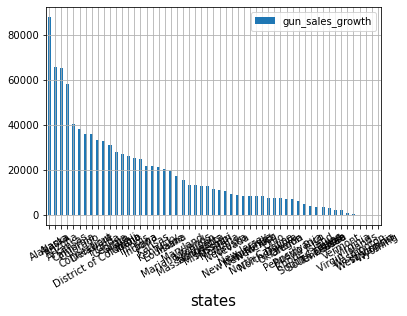

In [14]:
df_diff_new.plot(kind='bar')
plt.rcParams['figure.figsize'] = [12, 8]
tickvalues = range(0,len(df_diff_new['state']))
plt.xticks(ticks = tickvalues, labels = states, rotation = 30, fontsize=10)
plt.xlabel('states', fontsize=15)
plt.grid(True)
plt.show()

In [ ]:
#df1_2016 = new_df1[new_df1['month'].str.contains('2016')]
#df1_2016.reset_index(drop=True, inplace=True)
#df1_2016.tail()

In [ ]:
#df1_2016.query('month == "2016-07"')
#df1_2016_till07 = df1_2016.iloc[275:]
#df1_2016_till07

In [ ]:
#new_df1_2016_till07 = df1_2016_till07.groupby('state').sum()
#new_df1_2016_till07 = new_df1_2016_till07.rename_axis(None, axis=0)
#new_df1_2016_till07.reset_index(inplace=True)
#new_df1_2016_till07 = new_df1_2016_till07.rename(columns = {'index':'state'})
#new_df1_2016_till07

In [ ]:
#df_2016_combined = new_df1_2016_till07.merge(df2_2016_copy, left_on='state', right_on='state', how='inner')

In [ ]:
#df_2016_combined.head(5)

In [ ]:
#sum_column = df_2016_combined['handgun']*1.1 + df_2016_combined['long_gun']*1.1 + df_2016_combined['multiple']*2
#df_2016_combined.insert(4, 'estimated_gun_sales', sum_column, True)
#df_2016_combined.head()

In [ ]:
#df_2016_combined_copy = df_2016_combined.copy()
#df_2016_combined['estimated_gun_sales'] = df_2016_combined['estimated_gun_sales'].round(0).astype(int)
#df_2016_combined

In [ ]:
#new_df1_2016_till07 = new_df1_2016_till07.T
#new_df1_2016_till07.reset_index(inplace=True)
#new_df1_2016_till07=new_df1_2016_till07.rename(index=None, columns = {'index':'Fact'})
#new_df1_2016_till07

In [ ]:
#new_df1_2016_till07 = new_df1_2016_till07.drop(['District of Columbia', 'Guam', 'Mariana Islands', 'Puerto Rico', 'Virgin Islands'], axis=1)
#new_df1_2016_till07.dtypes

In [ ]:
#df2_copy = df2.copy()
#df2_copy.drop(['Fact Note'], axis=1, inplace=True)
#df2_copy.head(1)

In [ ]:
#(new_df1_2016_till07.columns == df2_copy.columns).all()

In [ ]:
#df2_2016 = df2_copy[df2_copy['Fact'].str.contains('2016')]
#df2_2016 = df2_2016.drop(labels=[1,2], axis=0)
#df2_2016.reset_index(drop=True, inplace=True)
#df2_2016.head(5)

In [ ]:
#df2_2016_T = df2_2016.T
#df2_2016_T.columns = df2_2016_T.iloc[0]
#df2_2016_T = df2_2016_T.iloc[1: , :]
#df2_2016_T.reset_index(inplace=True)
#df2_2016_T = df2_2016_T.rename(columns = {'index':'state'})
#df2_2016_T = df2_2016_T.rename_axis(None, axis=1)
#df2_2016_T.head()

In [ ]:
#df2_2016_copy = df2_2016_T.copy()
#for cols in df2_2016_copy.columns:
    #df2_2016_copy[cols]=df2_2016_copy[cols].str.replace(',','')
    #df2_2016_copy[cols]=df2_2016_copy[cols].str.replace('%','')
#df2_2016_copy

In [ ]:
#df2_2016_copy = df2_2016_copy.replace('Z', 0)
#df2_2016_copy

In [ ]:
#for column in df2_2016_copy.columns[1:]:
#    df2_2016_copy[column]=df2_2016_copy[column].astype(float)

In [ ]:
#df2_2016_copy.dtypes

In [ ]:
#for column in df2_2016_copy.columns[1:14]:
#    df2_2016_copy[column]=df2_2016_copy[column] / 100

In [ ]:
#df2_2016_copy

In [ ]:
#frames = [new_df1_2016_till07, df2_2016]
#df_combined_2016 = pd.concat(frames)
#df_combined_2016.reset_index(drop=True, inplace=True)
#df_combined_2016